# Load module

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_val_predict
import os
print(os.listdir("../data/processed/house"))

['df_fe_transformed.pickle', 'house.pkl', 'global_internal_obj_example.pkl', 'local_internal_obj_example.pkl', 'predicted_table.pkl']


# Load data

In [3]:
import joblib


filename = '../data/processed/house/df_fe_transformed.pickle'
df = joblib.load(filename)
df.head(3)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0   1           0         0         65.0     8450      0         0   
1   2           1         0         80.0     9600      0         0   
2   3           0         0         68.0    11250      0         1   

   LandContour  LotConfig  LandSlope  ...  GarageArea_log  WoodDeckSF_log  \
0            0          0          0  ...        6.308098        0.000000   
1            0          1          0  ...        6.133398        5.700444   
2            0          0          0  ...        6.411818        0.000000   

   OpenPorchSF_log  EnclosedPorch_log  3SsnPorch_log  ScreenPorch_log  \
0         4.127134                0.0            0.0              0.0   
1         0.000000                0.0            0.0              0.0   
2         3.761200                0.0            0.0              0.0   

   PoolArea_log  MiscVal_log  YearRemodAdd_log  TotalSF_log  
0           0.0          0.0          7.602900     7.850493  
1           0.0          0.0          7.589336     7.833996  
2           0.0          0.0          7.602401     7.903596  

[3 rows x 132 columns]

In [4]:
total, colnum = df.shape
total

2911

# Modeling

In [6]:
df_train = df[df['MlUse']=='train']
df_train.head(3)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0   1           0         0         65.0     8450      0         0   
1   2           1         0         80.0     9600      0         0   
2   3           0         0         68.0    11250      0         1   

   LandContour  LotConfig  LandSlope  ...  GarageArea_log  WoodDeckSF_log  \
0            0          0          0  ...        6.308098        0.000000   
1            0          1          0  ...        6.133398        5.700444   
2            0          0          0  ...        6.411818        0.000000   

   OpenPorchSF_log  EnclosedPorch_log  3SsnPorch_log  ScreenPorch_log  \
0         4.127134                0.0            0.0              0.0   
1         0.000000                0.0            0.0              0.0   
2         3.761200                0.0            0.0              0.0   

   PoolArea_log  MiscVal_log  YearRemodAdd_log  TotalSF_log  
0           0.0          0.0          7.602900     7.850493  
1           0.0          0.0          7.589336     7.833996  
2           0.0          0.0          7.602401     7.903596  

[3 rows x 132 columns]

In [11]:
from pycaret.regression import *
reg1 = setup(df_train, target = 'SalePrice', 
             session_id=123, 
             train_size=0.9,
             fold=2,
             log_experiment=True, 
             ignore_features=['Id','MlUse'],
             experiment_name='house1')

In [15]:
# best = compare_models(whitelist = ['catboost','lightgbm','xgboost'], fold=2, sort='RMSE')
best = compare_models()

In [23]:
catboost = create_model('catboost')

In [24]:
import shap


explainer = shap.TreeExplainer(catboost)

In [31]:
get_config('X')

LotFrontage  LotArea  Neighborhood  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0   8450.0           0.0     2003.0        2003.0       196.0   
1            80.0   9600.0           1.0     1976.0        1976.0         0.0   
2            68.0  11250.0           0.0     2001.0        2002.0       162.0   
3            60.0   9550.0           2.0     1915.0        1970.0         0.0   
4            84.0  14260.0           3.0     2000.0        2000.0       350.0   
...           ...      ...           ...        ...           ...         ...   
1451         62.0   7917.0          17.0     1999.0        2000.0         0.0   
1452         85.0  13175.0           6.0     1978.0        1988.0       119.0   
1453         66.0   9042.0           2.0     1941.0        2006.0         0.0   
1454         68.0   9717.0          11.0     1950.0        1996.0         0.0   
1455         75.0   9937.0          15.0     1965.0        1965.0         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_5  \
0          706.0         0.0      150.0        856.0  ...         0.0   
1          978.0         0.0      284.0       1262.0  ...         0.0   
2          486.0         0.0      434.0        920.0  ...         0.0   
3          216.0         0.0      540.0        756.0  ...         0.0   
4          655.0         0.0      490.0       1145.0  ...         0.0   
...          ...         ...        ...          ...  ...         ...   
1451         0.0         0.0      953.0        953.0  ...         0.0   
1452       790.0       163.0      589.0       1542.0  ...         0.0   
1453       275.0         0.0      877.0       1152.0  ...         0.0   
1454        49.0      1029.0        0.0       1078.0  ...         0.0   
1455       830.0       290.0      136.0       1256.0  ...         0.0   

      SaleType_6  SaleType_7  SaleType_8  SaleCondition_0  SaleCondition_1  \
0            0.0         0.0         0.0              1.0              0.0   
1            0.0         0.0         0.0              1.0              0.0   
2            0.0         0.0         0.0              1.0              0.0   
3            0.0         0.0         0.0              0.0              1.0   
4            0.0         0.0         0.0              1.0              0.0   
...          ...         ...         ...              ...              ...   
1451         0.0         0.0         0.0              1.0              0.0   
1452         0.0         0.0         0.0              1.0              0.0   
1453         0.0         0.0         0.0              1.0              0.0   
1454         0.0         0.0         0.0              1.0              0.0   
1455         0.0         0.0         0.0              1.0              0.0   

      SaleCondition_2  SaleCondition_3  SaleCondition_4  SaleCondition_5  
0                 0.0              0.0              0.0              0.0  
1                 0.0              0.0              0.0              0.0  
2                 0.0              0.0              0.0              0.0  
3                 0.0              0.0              0.0              0.0  
4                 0.0              0.0              0.0              0.0  
...               ...              ...              ...              ...  
1451              0.0              0.0              0.0              0.0  
1452              0.0              0.0              0.0              0.0  
1453              0.0              0.0              0.0              0.0  
1454              0.0              0.0              0.0              0.0  
1455              0.0              0.0              0.0              0.0  

[1456 rows x 431 columns]

In [32]:
X = get_config('X')

In [33]:
X

LotFrontage  LotArea  Neighborhood  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0   8450.0           0.0     2003.0        2003.0       196.0   
1            80.0   9600.0           1.0     1976.0        1976.0         0.0   
2            68.0  11250.0           0.0     2001.0        2002.0       162.0   
3            60.0   9550.0           2.0     1915.0        1970.0         0.0   
4            84.0  14260.0           3.0     2000.0        2000.0       350.0   
...           ...      ...           ...        ...           ...         ...   
1451         62.0   7917.0          17.0     1999.0        2000.0         0.0   
1452         85.0  13175.0           6.0     1978.0        1988.0       119.0   
1453         66.0   9042.0           2.0     1941.0        2006.0         0.0   
1454         68.0   9717.0          11.0     1950.0        1996.0         0.0   
1455         75.0   9937.0          15.0     1965.0        1965.0         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_5  \
0          706.0         0.0      150.0        856.0  ...         0.0   
1          978.0         0.0      284.0       1262.0  ...         0.0   
2          486.0         0.0      434.0        920.0  ...         0.0   
3          216.0         0.0      540.0        756.0  ...         0.0   
4          655.0         0.0      490.0       1145.0  ...         0.0   
...          ...         ...        ...          ...  ...         ...   
1451         0.0         0.0      953.0        953.0  ...         0.0   
1452       790.0       163.0      589.0       1542.0  ...         0.0   
1453       275.0         0.0      877.0       1152.0  ...         0.0   
1454        49.0      1029.0        0.0       1078.0  ...         0.0   
1455       830.0       290.0      136.0       1256.0  ...         0.0   

      SaleType_6  SaleType_7  SaleType_8  SaleCondition_0  SaleCondition_1  \
0            0.0         0.0         0.0              1.0              0.0   
1            0.0         0.0         0.0              1.0              0.0   
2            0.0         0.0         0.0              1.0              0.0   
3            0.0         0.0         0.0              0.0              1.0   
4            0.0         0.0         0.0              1.0              0.0   
...          ...         ...         ...              ...              ...   
1451         0.0         0.0         0.0              1.0              0.0   
1452         0.0         0.0         0.0              1.0              0.0   
1453         0.0         0.0         0.0              1.0              0.0   
1454         0.0         0.0         0.0              1.0              0.0   
1455         0.0         0.0         0.0              1.0              0.0   

      SaleCondition_2  SaleCondition_3  SaleCondition_4  SaleCondition_5  
0                 0.0              0.0              0.0              0.0  
1                 0.0              0.0              0.0              0.0  
2                 0.0              0.0              0.0              0.0  
3                 0.0              0.0              0.0              0.0  
4                 0.0              0.0              0.0              0.0  
...               ...              ...              ...              ...  
1451              0.0              0.0              0.0              0.0  
1452              0.0              0.0              0.0              0.0  
1453              0.0              0.0              0.0              0.0  
1454              0.0              0.0              0.0              0.0  
1455              0.0              0.0              0.0              0.0  

[1456 rows x 431 columns]

In [34]:
shap_values = explainer.shap_values(X)

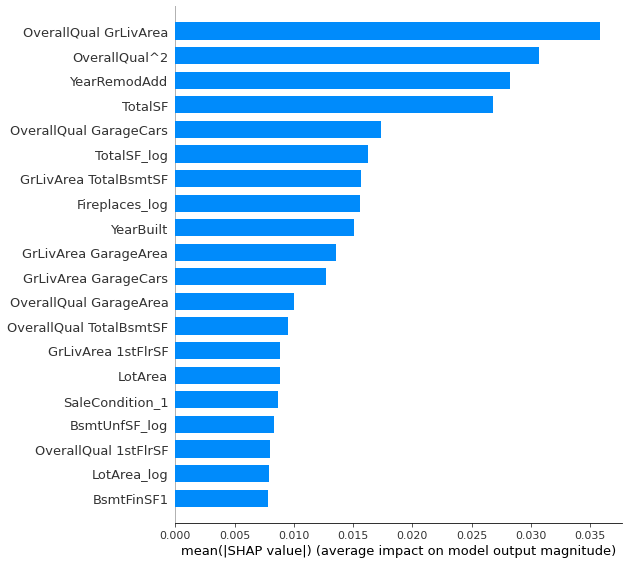

In [35]:
shap.summary_plot(shap_values,X,plot_type="bar",show=False)

In [36]:
np.exp(0.1212)

1.1288506599238206

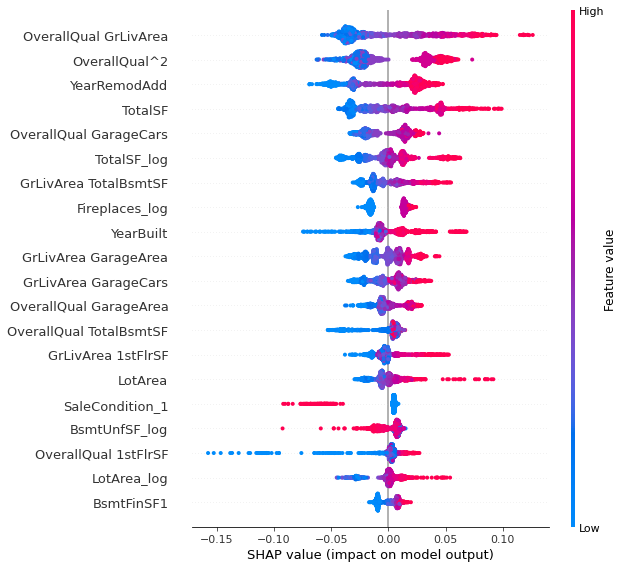

In [37]:
shap.summary_plot(shap_values,X,show=False)

In [38]:
expectation = explainer.expected_value

In [39]:
# house SalePrice의 평균은?
np.exp(expectation)

166536.5151099032

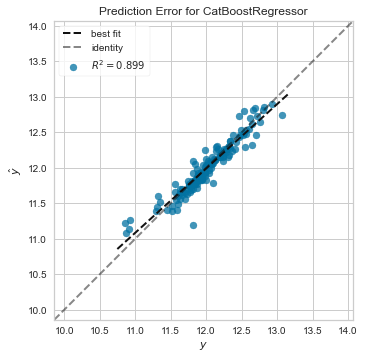

In [40]:
plot_model(catboost, 'error')

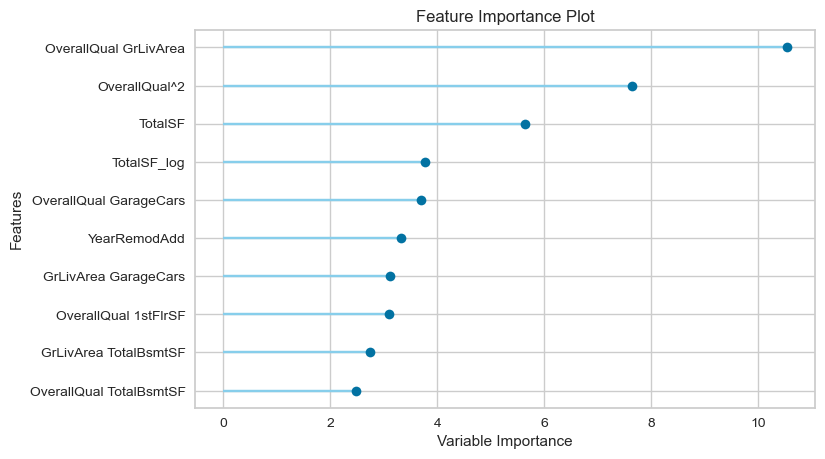

In [41]:
plot_model(catboost, 'feature')

In [42]:
plot_model(catboost, 'parameter')

Parameters
nan_mode                                           Min
eval_metric                                       RMSE
iterations                                        1000
sampling_frequency                             PerTree
leaf_estimation_method                          Newton
grow_policy                              SymmetricTree
penalties_coefficient                                1
boosting_type                                    Plain
model_shrink_mode                             Constant
feature_border_type                       GreedyLogSum
bayesian_matrix_reg                0.10000000149011612
l2_leaf_reg                                          3
random_strength                                      1
rsm                                                  1
boost_from_average                                True
model_size_reg                                     0.5
subsample                            0.800000011920929
use_best_model                                   False
random_seed                                        123
depth                                                6
posterior_sampling                               False
border_count                                       254
classes_count                                        0
auto_class_weights                                None
sparse_features_conflict_fraction                    0
leaf_estimation_backtracking            AnyImprovement
best_model_min_trees                                 1
model_shrink_rate                                    0
min_data_in_leaf                                     1
loss_function                                     RMSE
learning_rate                      0.04095200076699257
score_function                                  Cosine
task_type                                          CPU
leaf_estimation_iterations                           1
bootstrap_type                                     MVS
max_leaves                                          64

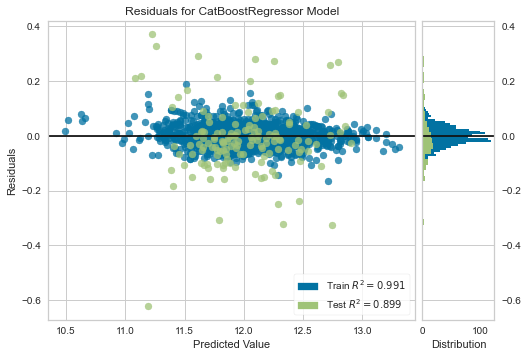

In [43]:
plot_model(catboost, 'residuals')

In [47]:
print('11-->{}'.format(np.exp(11)))
print('12-->{}'.format(np.exp(12)))
print('13-->{}'.format(np.exp(13)))

11-->59874.14171519782
12-->162754.79141900392
13-->442413.3920089205


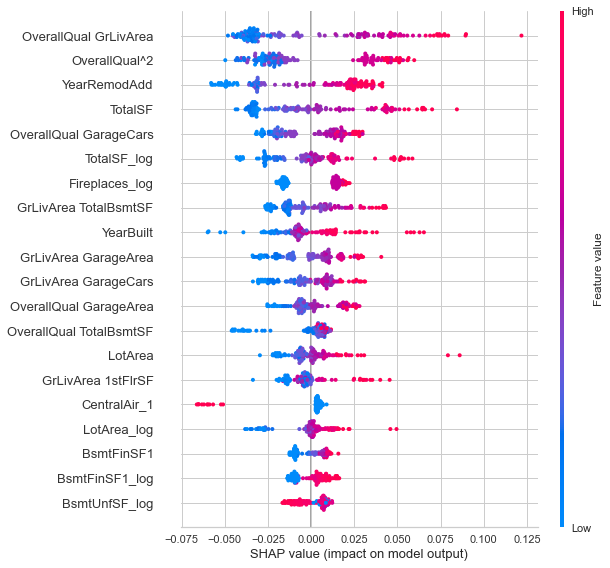

In [51]:
interpret_model(catboost)

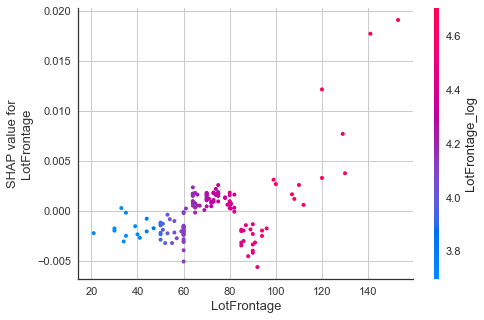

In [52]:
interpret_model(catboost, plot = 'correlation')

In [54]:
interpret_model(catboost, plot = 'reason', observation = 10)

In [55]:
np.exp(12.73)

337729.31147962186